In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### import Data

In [10]:
data = pd.read_csv("Theta.csv")
df = data.copy()
df.head()

,Goal Levels,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5ace20379fe7b01d5806bec9,-0.30,-0.30,-1.53,-2.27,-1.98,-1.57,-1.26,-1.00,-1.08,-1.12,-1.24,-1.29,-1.31,-1.35,-1.37
1,5ace20379fe7b01d5806bebb,1.23,0.91,-0.51,-0.77,-1.49,-1.99,-2.19,-2.24,-2.31,-2.41,-2.38,-2.38,-2.37,-2.39,-2.41
2,5ace203f9fe7b01d5806c144,-0.05,0.26,-0.22,-0.62,-1.05,-0.82,-1.12,-1.29,-1.29,-1.58,-1.75,-1.88,-1.96,-2.02,-2.05
3,5ace203f9fe7b01d5806c145,-0.05,1.45,0.24,0.89,0.81,0.51,0.22,0.03,0.02,-0.19,-0.39,-0.55,-0.64,-0.70,-0.72
4,5ace20349fe7b01d5806bdcc,NaN,2.67,0.55,1.05,1.20,1.01,0.48,0.71,0.66,0.40,0.28,0.21,0.21,0.19,0.19


In [3]:
df.shape

(648, 16)

In [5]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
count,553.000000,621.000000,636.000000,644.000000,646.000000,647.000000,647.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,1.150127,0.491546,0.079623,0.199860,0.066858,0.033679,-0.108547,-0.238472,-0.302145,-0.489059,-0.637392,-0.736080,-0.794846,-0.836204,-0.862793
std,2.292796,1.706384,1.402894,1.382101,1.267742,1.206579,1.158866,1.137292,1.129045,1.107643,1.094798,1.081579,1.074110,1.070627,1.066161
min,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,-0.200000,-0.550000,-0.772500,-0.562500,-0.637500,-0.690000,-0.750000,-0.892500,-0.930000,-1.140000,-1.270000,-1.330000,-1.402500,-1.450000,-1.480000
50%,1.700000,0.560000,0.080000,0.285000,0.130000,0.090000,-0.050000,-0.200000,-0.285000,-0.510000,-0.640000,-0.745000,-0.805000,-0.850000,-0.875000
75%,3.030000,1.700000,1.022500,1.122500,0.947500,0.830000,0.620000,0.490000,0.400000,0.200000,0.010000,-0.110000,-0.170000,-0.210000,-0.250000
max,4.000000,4.000000,4.000000,4.000000,3.410000,3.220000,3.190000,3.170000,3.210000,3.230000,3.210000,3.140000,3.090000,3.070000,3.070000


In [6]:
def RawNull(data):
    n=data.isnull().sum(axis=1)
    s=0
    for i in range(len(n)):
        if n[i] != 0:
            s=s+1
    p = print("Number of Raws having Null values:-",s)
    return p

In [8]:
RawNull(data=df)

Number of Raws having Null values:- 98


In [9]:
# We drop raws having null values
df1 = df.dropna(axis=0)
df1.shape

(550, 16)

In [12]:
###Drop the Fist Column
df2 = df1.drop(columns='Goal Levels')
df2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,-0.30,-0.30,-1.53,-2.27,-1.98,-1.57,-1.26,-1.00,-1.08,-1.12,-1.24,-1.29,-1.31,-1.35,-1.37
1,1.23,0.91,-0.51,-0.77,-1.49,-1.99,-2.19,-2.24,-2.31,-2.41,-2.38,-2.38,-2.37,-2.39,-2.41
2,-0.05,0.26,-0.22,-0.62,-1.05,-0.82,-1.12,-1.29,-1.29,-1.58,-1.75,-1.88,-1.96,-2.02,-2.05
3,-0.05,1.45,0.24,0.89,0.81,0.51,0.22,0.03,0.02,-0.19,-0.39,-0.55,-0.64,-0.70,-0.72
7,3.85,2.27,-0.60,-0.52,-0.67,-0.52,-0.63,-0.63,-0.50,-0.53,-0.50,-0.44,-0.42,-0.41,-0.41


#### Check for single row

In [60]:
r1 = df2.iloc[30]

Text(0, 0.5, 'Ability')

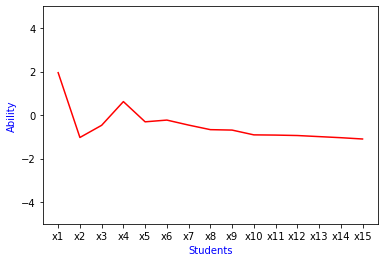

In [61]:
plt.plot(r1,color='r')
plt.ylim(-5,5)
plt.xlabel('Students',color='b')
plt.ylabel('Ability',color='b')

In [22]:
def smoothing(row):
    
    dif=np.diff(row.values)
    j=0
    while(any(dif>0) or any(row.values>4)):

        for i in range(len(row)):
            if row[i]>4:
                row[i]=4
            else:
                pass
            
    
            if i == (len(row)-1):
                pass
            #print(r1[i])
            elif row[i] < row[i+1]:
                row[i] = 0.01+row[i+1]
            else:
                pass
                
        dif=np.diff(row.values)  
        j+=1
        
    
        
   # print(row[0])
    

    plt.plot(row)      
    plt.ylim(-3,6)
    return any(dif>0)

1.95


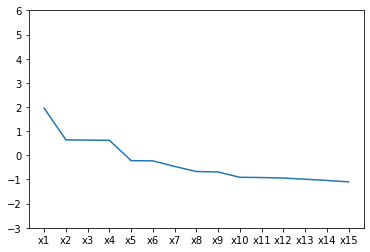

In [62]:
R = smoothing(row=r1)

#### Smoothing All rows

In [64]:
def smoothing(row):
    
    dif=np.diff(row.values)
    j=0
    while(any(dif>0) or any(row.values>4)):

        for i in range(len(row)):
            if row[i]>4:
                row[i]=4
            else:
                pass
            
    
            if i == (len(row)-1):
                pass
            #print(r1[i])
            elif row[i] < row[i+1]:
                row[i] = 0.01+row[i+1]
            else:
                pass
                
        dif=np.diff(row.values)  
        j+=1
        
    
        
   # print(row[0])
    

    #plt.plot(row)      
    #plt.ylim(-3,6)
    return any(dif>0)

In [66]:
for i in range(df2.shape[0]):
    row = df2.iloc[i]
    R=smoothing(row=row)

#### Diffrence before smoothing

In [67]:
# Diffrence before smoothing
for i in range(df1.iloc[:,1:].shape[0]):
    dif=np.diff(df1.iloc[i,1:].values)
    idx=np.where(dif>0)[0]
    print(idx)

[3 4 5 6]
[ 9 11]
[0 4]
[0 2]
[ 2  4  7  9 10 11 12]
[0 1 2]
[0 1 2 3 5]
[ 2  3  4  9 13]
[ 2 13]
[2 6 8]
[ 1  4  6  8  9 10 11]
[0 2 3 4]
[2]
[2 4]
[0 2 4 5]
[2 4 7]
[4 8]
[3 4]
[]
[2 4 9]
[]
[0 2 4]
[2]
[0 2 3]
[2 3 4]
[1 2 5]
[0]
[1 2 3 4]
[1 2 4]
[2]
[1 2 4]
[2 4]
[ 4  6 12]
[0 1 2 4 7 8]
[4 6 7]
[ 2  3  7  8  9 10]
[0 2]
[1 4]
[0 1 6 8]
[1 5 6 7 8]
[0 2]
[0 2 3 4 7]
[2]
[4]
[3 4]
[2 4 5 7]
[3]
[2 3 4 5]
[2]
[2 8]
[2 5]
[2 3]
[0 2 3 5 6 7]
[2]
[1 2 3 5]
[0 6]
[ 1  2 12]
[3 4]
[3]
[4]
[1 2 3 4]
[2 3 4]
[0 2]
[0 1 2 4 6 7]
[1 7]
[ 0  1  2 10]
[ 0  2  3  5  7  8 11]
[0 3 4]
[1]
[4 6]
[0 2 3 7]
[2 4 5]
[2 4]
[ 2  4  5  7  8 11 12]
[ 0  9 10]
[3]
[2 3 4 6]
[ 0  2  7 10 11 12]
[2 3 4 7]
[0 1 2 4 6 7]
[0 7]
[5]
[2]
[2 3 5]
[1 6 7]
[2 4]
[ 4  5  8  9 10 11]
[0 1 5 8]
[1 7]
[2 4]
[ 1  2  3  5  8  9 12]
[2]
[2]
[4 5 7 8]
[1 2]
[1 3 4 5]
[0 2]
[0 2 4 5 7]
[0 1 3 4 7]
[]
[1 2 3 4]
[0 1 2 3]
[2 3 4]
[ 0  1  2  4  8  9 10]
[1 2]
[3 4]
[2 4]
[0 2 5]
[]
[1 2]
[2 3 4]
[2]
[1 2 6]
[0 3]
[2 4]
[1 3 4

#### Diffrence After smoothing

In [68]:
for i in range(df2.shape[0]):
    dif=np.diff(df2.iloc[i].values)
    idx=np.where(dif>0)[0]
    print(idx)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

### Plot Random 10 rows

In [88]:

def Plot10(data):
    #Ten = np.random.randint(0,550,10)
    plt.figure(figsize=(15,8))
    for j in range(10):
        plot1 = plt.plot(data.iloc[Ten[j],1:]) 

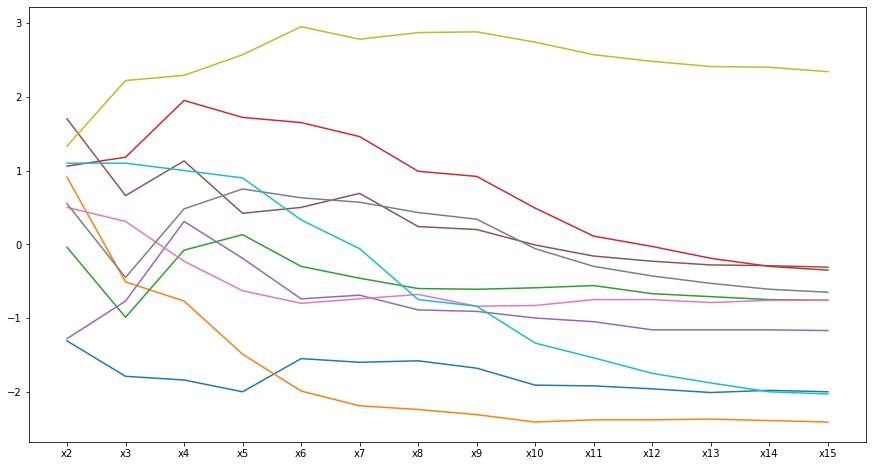

In [95]:
# Original data
Ten = np.random.randint(0,550,10)
Plot10(data=df1.iloc[:,1:])

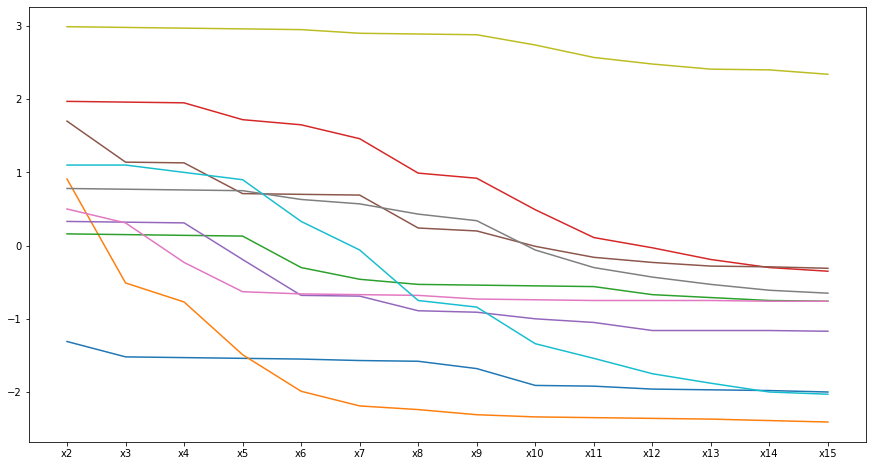

In [96]:
# Smoothing data
Plot10(data=df2)